In [2]:
import requests #пакет для парсинга, т.е. для извлечения информации с сайта. мы будем парсить сайт, имеющий api
import json #пакет для работы с данными в формате json
import re #пакет для работы с регулярными выражениями
import pandas as pd #пакет для очистки и первичного анализа данных
import math #пакет для выполнения математических операций
import numpy as np #продвинутый пакет для выполнения математических операций и операций с массивами

In [31]:
df.head()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_8,name_8,id_9,name_9,id_10,name_10,id_11,name_11,id_12,name_12
0,https://doi.org/10.31857/s013216250009460-9,All-Russian National Identity: Searching for D...,2020,12,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4345952183,Леокадия Михайловна Дробижева,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,Manageability: Sociological theoretical analys...,2007,11,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A2465284132,M. V Rubtsova,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://doi.org/10.7868/s0132162518030029,МИЛЛЕНИАЛЫ НА ФОНЕ ПРЕДШЕСТВУЮЩИХ ПОКОЛЕНИЙ: Э...,2018,11,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4305835872,В.В. Радаев,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://doi.org/10.31857/s013216250008325-0,From «Smart Regulation» to «Smart Management»:...,2020,9,2,Sotsiologicheskie Issledovaniya,https://openalex.org/A4348437703,Alexander N. Tikhonov,https://openalex.org/A4357908561,Vladimir Y. Bogdanov,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://doi.org/10.31857/s013216250002784-5,Dynamics of the Social Attitudes of the Russia...,2018,8,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4341030988,V. O. Petukhov,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.tail()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_8,name_8,id_9,name_9,id_10,name_10,id_11,name_11,id_12,name_12
1902,None,Истина и политический контекст в научных практ...,2005,0,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4334462866,Юрий Львович Качанов,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,None,Уклонение от уплаты налогов (опыт анализа соци...,2007,0,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4333655790,Санина Анна Георгиевна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,None,Субъективность в качественном исследовании: но...,2007,0,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4350190634,Старовойтенко Елена Борисовна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,None,Особенности построения ценовых стратегий вузам...,2009,0,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4344281566,Олександра Олегівна Логунова,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,None,И снова о женском предпринимательстве,2008,0,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4352745872,Барсукова Светлана Юрьевна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(df['year'].value_counts(dropna = False, sort = False))

2020    245
2007     13
2018    318
2019    272
1988      3
2017    158
2021    273
1978      1
2022    168
2009     24
2008     21
2010     21
1982      4
1992     14
2005     30
1997      6
2016     45
2012     26
2013     34
2011     30
2015     40
2002      7
2004      9
2006     14
1999      7
1993      4
2001      3
2003      7
1990      6
1996     12
1994     11
1984      4
1991      5
1981      7
1987      2
1998      4
1969      2
1986      3
1983      1
2014     39
1979      1
1989      5
1985      2
2000      6
Name: year, dtype: int64


In [34]:
df = df[df['name_1'].notna()] # оставим только те публикации, у которых есть хотя бы один автор 
df = df[df['title'].notna()] # оставим только те публикации, у которых есть есть название
df = df.loc[(df['year']>=2015) & (df['year']<=2017)] # ограничим данные статьями, опубликованными в 2015-2017 гг.

# В Ваших журналах могут быть другие проблемы, действуйте по обстоятельствам
# временной интервал выбирайте также исходя из Ваших обстоятельств, но не позднее 2021 г. 
# и не менее 200 статей в сумме за весь период

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 53 to 1755
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doi        122 non-null    object
 1   title      243 non-null    object
 2   year       243 non-null    object
 3   cited_by   243 non-null    object
 4   N_authors  243 non-null    object
 5   source     243 non-null    object
 6   id_1       243 non-null    object
 7   name_1     243 non-null    object
 8   id_2       108 non-null    object
 9   name_2     108 non-null    object
 10  id_3       45 non-null     object
 11  name_3     45 non-null     object
 12  id_4       6 non-null      object
 13  name_4     6 non-null      object
 14  id_5       0 non-null      object
 15  name_5     0 non-null      object
 16  id_6       0 non-null      object
 17  name_6     0 non-null      object
 18  id_7       0 non-null      object
 19  name_7     0 non-null      object
 20  id_8       0 non-null      obj

In [35]:
df.head()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_8,name_8,id_9,name_9,id_10,name_10,id_11,name_11,id_12,name_12
53,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,https://openalex.org/A4301532461,Борис Ильич БЕДНЫЙ,https://openalex.org/A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4298950991,Т. А. ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,https://openalex.org/A4347296618,Геннадий Филиппович Шафранов-куцев,https://openalex.org/A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df[df['doi'].isnull()].tail()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_8,name_8,id_9,name_9,id_10,name_10,id_11,name_11,id_12,name_12
1139,None,ВЗАИМОДЕЙСТВИЕ ОБЩНОСТЕЙ АКАДЕМИЧЕСКОГО СЕКТОР...,2017,0,3,Sotsiologicheskie Issledovaniya,https://openalex.org/A4342836858,В.В. Васильев,https://openalex.org/A4338418018,М В Ермолаева,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1152,None,Редистрибутивная модель социального поведения ...,2017,0,2,Sotsiologicheskie Issledovaniya,https://openalex.org/A4336311783,М.В. Мартынов,https://openalex.org/A2760256276,Виктория Сергеевна Пуртова,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362,None,Intercultural communication and acculturation ...,2015,0,1,Sotsiologicheskie Issledovaniya,https://openalex.org/A4349436443,R. Tangalycheva,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1427,None,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,https://openalex.org/A4354174298,Наталья Вадимовна Веселкова,https://openalex.org/A4354801295,М. Н. Вандышев,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,None,Об основных векторах развития метода интервью,2017,0,3,Sotsiologicheskie Issledovaniya,https://openalex.org/A4330528501,Natalia V. Veselkova,https://openalex.org/A4342658561,Mikhail Vandyshev,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
female_end_list = ['ova', 'ina', 'eva', 'aia', 'aya', 'vna', 'ова', 'ина', 'ева', 'ая', 'вна']
male_end_list = ['ov', 'in', 'ev', 'ky', 'ii', 'yi', 'iy', 'ny', 'oy', 'oi', 'ин', 'ов', 'ев', 'ий', 'ой']

def Author_gender(Author):
    gender_list = []
    gender = ''
    auth_list = Author.split(sep = ' ')
    for auth in auth_list:
        for i in female_end_list:
            if auth.endswith(i) == True:
                gender_list.append('f')
        for i in male_end_list:
            if auth.endswith(i) == True:
                gender_list.append('m')
    if (gender_list == ['m']) | (gender_list == ['m', 'm']):
        gender = 'm'
    elif (gender_list == ['f']) | (gender_list == ['f', 'f']):
        gender = 'f'
    else:
        gender = '???'
    return gender   

In [38]:
df['N_authors'] = df['N_authors'].astype('int')
max_n_authors = df['N_authors'].max()

for x in range(1, max_n_authors + 1):
    str_x = str(x)
    # чистка данных по id и имени авторов с использованием синтаксиса регулярных выражений
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('\.', '', regex=True)
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('  ', ' ', regex=True)    
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('^\s+', '', regex=True)
    df[f'name_{str_x}'] = df[f'name_{str_x}'].str.replace('\s+$', '', regex=True)
    df[f'id_{str_x}'] = df[f'id_{str_x}'].replace('https://openalex.org/', '', regex=True)
    # Создание переменных пола авторов
    df[f'gender_{str_x}'] = df[f'name_{str_x}'].apply(lambda x: Author_gender(x) if isinstance(x, str) else x)
    
df.tail()

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_10,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4
1735,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,???,NaN,NaN,NaN
1739,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN
1740,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,NaN,???,???,NaN,NaN
1748,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,NaN,???,f,NaN,NaN
1755,https://doi.org/10.7868/s0132162517120121,РЫНОК СОЦИОЛОГИЧЕСКИХ И МАРКЕТИНГОВЫХ ИССЛЕДОВ...,2017,0,3,Sotsiologicheskie Issledovaniya,A4305926399,Надежда Васильевна ДУЛИНА,A4305926400,Владимир Борисович ЗВОНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,NaN,f,???,m,NaN


In [39]:
df.to_excel('Socio_Issledovania1.xlsx') 

### 1.	Рассчитайте общее количество статей, опубликованных в журнале в целом за выбранный период и за отдельные годы внутри этого периода. Постройте график, опишите динамику.

In [40]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 53 to 1755
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doi        122 non-null    object
 1   title      243 non-null    object
 2   year       243 non-null    object
 3   cited_by   243 non-null    object
 4   N_authors  243 non-null    int32 
 5   source     243 non-null    object
 6   id_1       243 non-null    object
 7   name_1     243 non-null    object
 8   id_2       108 non-null    object
 9   name_2     108 non-null    object
 10  id_3       45 non-null     object
 11  name_3     45 non-null     object
 12  id_4       6 non-null      object
 13  name_4     6 non-null      object
 14  id_5       0 non-null      object
 15  name_5     0 non-null      object
 16  id_6       0 non-null      object
 17  name_6     0 non-null      object
 18  id_7       0 non-null      object
 19  name_7     0 non-null      object
 20  id_8       0 non-null      obj

Видим, что за период с 2015 по 2017 год было опубликовано 243 статьи.

In [43]:
df15 = df[df['year'] == 2015] #вычислим кол-во статей за 2015 год
df15.shape[0]

40

In [44]:
df16 = df[df['year'] == 2016] #вычислим кол-во статей за 2016 год
df16.shape[0]

45

In [45]:
243-40-45# кол-во статей за 2017 год

158

40 статей было написано в 2015 году, 45 - в 2016 и 158 статей в 2017. 

In [49]:
import matplotlib.pyplot as plt

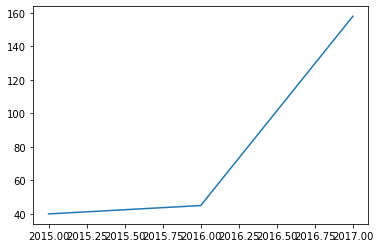

In [54]:
Y = [40, 45, 158]
X = [2015, 2016, 2017]
plt.plot(X, Y)

Динамика: видим довольно незначительное повышение кол-ва статей в 2016 году по сравнению с 2015, а затем резкий скачок в 2017 году, который почти в 3 раза больше, чем количество статей в 2016 году

### 2.	Рассчитайте общее количество авторов, среднее количество авторов в расчете на одну статью (в целом за период и по годам). Рассчитайте те же показатели отдельно по мужчинам и женщинам. Сведите все результаты в одну таблицу.

In [55]:
df

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_10,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4
53,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,NaN,???,m,???,NaN
56,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
57,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
90,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,???,NaN,NaN,NaN
94,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,NaN,m,???,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,???,NaN,NaN,NaN
1739,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN
1740,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,NaN,???,???,NaN,NaN
1748,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,NaN,???,f,NaN,NaN


Максимальное кол-во авторов в одной статье за выбранный период равно 4.

In [182]:

excel_data = pd.read_excel('Socio_Issledovania1.xlsx')
data = pd.DataFrame(excel_data)
print("The content of the file is:\n", data)

The content of the file is:
      Unnamed: 0                                        doi  \
0            53  https://doi.org/10.7868/s0132162517090148   
1            56  https://doi.org/10.7868/s0132162517070054   
2            57  https://doi.org/10.7868/s0132162517110046   
3            90  https://doi.org/10.7868/s0132162517110113   
4            94  https://doi.org/10.7868/s013216251709015x   
..          ...                                        ...   
238        1735  https://doi.org/10.7868/s0132162517090094   
239        1739  https://doi.org/10.7868/s0132162517060046   
240        1740  https://doi.org/10.7868/s0132162517120042   
241        1748  https://doi.org/10.7868/s0132162517100087   
242        1755  https://doi.org/10.7868/s0132162517120121   

                                                 title  year  cited_by  \
0    Российская аспирантура в образовательном поле:...  2017         4   
1    КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...  2017         3   
2   

In [183]:
data.columns

Index(['Unnamed: 0', 'doi', 'title', 'year', 'cited_by', 'N_authors', 'source',
       'id_1', 'name_1', 'id_2', 'name_2', 'id_3', 'name_3', 'id_4', 'name_4',
       'id_5', 'name_5', 'id_6', 'name_6', 'id_7', 'name_7', 'id_8', 'name_8',
       'id_9', 'name_9', 'id_10', 'name_10', 'id_11', 'name_11', 'id_12',
       'name_12', 'gender_1', 'gender_2', 'gender_3', 'gender_4'],
      dtype='object')

In [184]:
data1 = data.drop(columns = ['Unnamed: 0'])

In [185]:
data1

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_10,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,NaN,m,m,m,NaN
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,NaN,m,f,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN


In [186]:
data2 = data1[['id_1', 'id_2', 'id_3', 'id_4', 'gender_1', 'gender_2', 'gender_3', 'gender_4']]

In [187]:
data2

,id_1,id_2,id_3,id_4,gender_1,gender_2,gender_3,gender_4
0,A4301532461,A4333189249,A4301532463,NaN,m,m,m,NaN
1,A4341062429,NaN,NaN,NaN,m,NaN,NaN,NaN
2,A4332564855,NaN,NaN,NaN,f,NaN,NaN,NaN
3,A4298950991,NaN,NaN,NaN,f,NaN,NaN,NaN
4,A4347296618,A4338484201,A4343199649,NaN,m,f,f,NaN
...,...,...,...,...,...,...,...,...
238,A4305426755,NaN,NaN,NaN,m,NaN,NaN,NaN
239,A4354174298,A4354801295,A4358558874,NaN,f,m,f,NaN
240,A2804712713,A4305561109,NaN,NaN,m,m,NaN,NaN
241,A4305752505,A4337913451,NaN,NaN,f,f,NaN,NaN


In [188]:
len(data2['id_1'])+len(data2['id_2'].dropna())+len(data2['id_3'].dropna())+len(data2['id_4'].dropna())
# всего 402 автора

402

In [189]:
data1

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_10,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,NaN,m,m,m,NaN
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,NaN,m,f,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN


In [190]:
data1['N_authors'].sum()/243 # среднее кол-во авторов на одну статью за период

1.654320987654321

In [191]:
data15 = data1[data1['year'] == 2015]
data15['N_authors'].sum()/40 # среднее кол-во авторов за 2015 год на одну статью

1.575

In [192]:
data16 = data1[data1['year'] == 2016]
data16['N_authors'].sum()/45 # среднее кол-во авторов за 2016 год на одну статью

1.6888888888888889

In [193]:
data17 = data1[data1['year'] == 2017]
data17['N_authors'].sum()/158# среднее кол-во авторов за 2017 год на одну статью

1.6645569620253164

In [194]:
lst = data1['gender_1'].to_list()+data1['gender_2'].to_list()+data1['gender_3'].to_list()+data1['gender_4'].to_list()
lst = np.array(lst)
lst_r = list()
for i in lst:
    if i != 'nan':
        lst_r.append(i)

men = 0
wom = 0
for i in lst_r:
    if i == 'm':
        men +=1
    elif i == 'f':
        wom +=1
        
men, wom, men+wom

(162, 237, 399)

In [195]:
162/399, 237/399

(0.40601503759398494, 0.5939849624060151)

In [196]:
data15

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_10,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4
22,NaN,Relationship of alcohol consumption with socia...,2015,1,1,Sotsiologicheskie Issledovaniya,A2592345996,Kotelnikova Zoya,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
50,NaN,Концепция кейс-стади в социальных науках и фра...,2015,0,2,Sotsiologicheskie Issledovaniya,A2433231573,Козина Ирина Марксовна,A4355627428,Свиридова Людмила Васильевна,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN
51,NaN,"Урбанизация, дезурбанизация и сельско-городски...",2015,0,3,Sotsiologicheskie Issledovaniya,A4352797281,Татьяна Григорьевна Нефедова,A4336935115,Никита Евгеньевич Покровский,...,NaN,NaN,NaN,NaN,NaN,NaN,f,m,m,NaN
52,NaN,ОСОБЕННОСТИ СТАТУСНОЙ ИДЕНТИЧНОСТИ И ПОТРЕБЛЕН...,2015,0,1,Sotsiologicheskie Issledovaniya,A4344293155,Тихонова Наталья Евгеньевна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
53,NaN,"Что ждет социологию: вымирание, застой или эво...",2015,0,1,Sotsiologicheskie Issledovaniya,A4336929269,Данфорд Ричард,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
57,NaN,Социология и компьютерные технологии,2015,0,1,Sotsiologicheskie Issledovaniya,A4342568617,Трошкина Татьяна Николаевна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
60,NaN,Наблюдатели на выборах в России,2015,0,1,Sotsiologicheskie Issledovaniya,A2590829727,Скокова Юлия Аркадиевна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
61,NaN,Ожидаемая модернизация регионов Дальневосточно...,2015,0,1,Sotsiologicheskie Issledovaniya,A4333661974,Немировская Анна Валентиновна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
63,NaN,Материнская карьера: дети и трудовые стратегии,2015,0,1,Sotsiologicheskie Issledovaniya,A4351604810,Исупова Ольга Генриховна,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
64,NaN,Женщины-мигрантки в нише домашнего труда в России,2015,0,1,Sotsiologicheskie Issledovaniya,A4336231483,Л Т Карачурина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN


In [197]:
lst_15 = data15['gender_1'].to_list()+data15['gender_2'].to_list()+data15['gender_3'].to_list()+data15['gender_4'].to_list()

In [198]:
lst_15 = np.array(lst_15)

In [199]:
lst_15

array(['f', 'f', 'f', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
       'm', 'f', 'f', 'f', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm',
       'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'f', 'f', 'f',
       'f', 'nan', 'f', 'm', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'f', 'f', 'nan', 'f', 'f', 'nan', 'f', 'nan', 'm', 'nan',
       'nan', 'f', 'nan', 'm', 'nan', 'm', 'nan', 'nan', 'nan', 'nan',
       'nan', 'f', 'm', 'f', 'f', 'f', 'nan', 'm', 'nan', 'nan', 'nan',
       'nan', 'm', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'm',
       'nan', 'nan', 'nan', 'm', 'nan', 'nan', 'nan', 'f', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'f', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'f', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',

In [200]:
lst_15_r = list()
for i in lst_15:
    if i != 'nan':
        lst_15_r.append(i)

In [201]:
lst_15_r

['f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'f',
 'f',
 'f',
 'f',
 'm',
 'f',
 'm',
 'm',
 'f',
 'm',
 'f',
 'f',
 'f',
 'm',
 'm',
 'm',
 'm',
 'f',
 'f',
 'f']

In [202]:
men = 0
wom = 0
for i in lst_15_r:
    if i == 'm':
        men +=1
    elif i == 'f':
        wom +=1

In [203]:
men, wom, men+wom

(18, 45, 63)

In [204]:
18/63, 45/63 #среднее кол-во авторов м и ж на одну статью в 2015г

(0.2857142857142857, 0.7142857142857143)

In [205]:
lst_16 = data16['gender_1'].to_list()+data16['gender_2'].to_list()+data16['gender_3'].to_list()+data16['gender_4'].to_list()
lst_16 = np.array(lst_16)
lst_16_r = list()
for i in lst_16:
    if i != 'nan':
        lst_16_r.append(i)

men = 0
wom = 0
for i in lst_16_r:
    if i == 'm':
        men +=1
    elif i == 'f':
        wom +=1
        
men, wom, men+wom

(24, 52, 76)

In [206]:
24/76, 52/76 #среднее кол-во авторов м и ж на одну статью в 2016г

(0.3157894736842105, 0.6842105263157895)

In [207]:
lst_17 = data17['gender_1'].to_list()+data17['gender_2'].to_list()+data17['gender_3'].to_list()+data17['gender_4'].to_list()
lst_17 = np.array(lst_17)
lst_17_r = list()
for i in lst_17:
    if i != 'nan':
        lst_17_r.append(i)

men = 0
wom = 0
for i in lst_17_r:
    if i == 'm':
        men +=1
    elif i == 'f':
        wom +=1
        
men, wom, men+wom

(120, 140, 260)

In [208]:
120/260, 140/260#среднее кол-во авторов м и ж на одну статью в 2017г

(0.46153846153846156, 0.5384615384615384)

## 5.	Создайте переменную, описывающую гендерный состав авторов статьи: все авторы – мужчины, все авторы – женщины или смешанный гендерный состав авторов (при необходимости выделить в отдельную категорию статьи, в которых невозможно определить пол хотя бы одного из авторов). Рассчитайте доли статей каждого типа в целом за период и по отдельным годам. Постройте график и опишите динамику.

In [209]:
data1

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_10,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,NaN,m,m,m,NaN
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,NaN,m,f,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN


In [210]:
data111 = data1
data111['type'] = ''

In [211]:
data111

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,m,m,m,NaN,
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,m,f,f,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN,
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN,


In [212]:
data111 = data111.fillna(0)

In [213]:
data111

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,0.0,0.0,0.0,0.0,0.0,m,m,m,0,
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,0.0,0.0,0.0,0.0,0.0,f,m,f,0,
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,0.0,0.0,0.0,0.0,0.0,m,m,0,0,
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,0.0,0.0,0.0,0.0,0.0,f,f,0,0,


In [214]:
for i in range(243):
    if data111['gender_1'][i] == 'm' and (data111['gender_2'][i] == 'm' or data111['gender_2'][i] == 0) and (data111['gender_3'][i] == 'm' or data111['gender_3'][i] == 0) and (data111['gender_4'][i] == 'm' or data111['gender_4'][i] == 0):
        data111['type'][i] =  'm_only' #only male authers
    elif data111['gender_1'][i] == 'f' and (data111['gender_2'][i] == 'f' or data111['gender_2'][i] == 0) and (data111['gender_3'][i] == 'f' or data111['gender_3'][i] == 0) and (data111['gender_4'][i] == 'f' or data111['gender_4'][i] == 0):
        data111['type'][i] =  'f_only' #only female authers
    else:
        data111['type'][i] =  'mixed' #mixed

C:\Users\79150\AppData\Local\Temp/ipykernel_29796/1551547736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data111['type'][i] =  'm_only' #only male authers
C:\Users\79150\AppData\Local\Temp/ipykernel_29796/1551547736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data111['type'][i] =  'f_only' #only female authers
C:\Users\79150\AppData\Local\Temp/ipykernel_29796/1551547736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [215]:
data111

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,0.0,0.0,0.0,0.0,0.0,m,m,m,0,m_only
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,m_only
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,f_only
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,f_only
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,m_only
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,0.0,0.0,0.0,0.0,0.0,f,m,f,0,mixed
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,0.0,0.0,0.0,0.0,0.0,m,m,0,0,m_only
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,0.0,0.0,0.0,0.0,0.0,f,f,0,0,f_only


In [216]:
if data1['gender_1'][0] == 'm' and (data1['gender_2'][0] == 'm' or data1['gender_2'][0] == 0) and (data1['gender_3'][0] == 'm' or data1['gender_3'][0] == 0) and (data1['gender_4'][0] == 'm' or data1['gender_4'][0] == 0):
    data111['type'][0] =  1

In [218]:
len(data111[data111['type']=='mixed']), len(data111[data111['type']=='m_only']), len(data111[data111['type']=='f_only']) #mixed

(58, 67, 118)

In [219]:
#доли типов статей за период
58/243, 67/243, 118/243 


(0.23868312757201646, 0.2757201646090535, 0.48559670781893005)

In [220]:
#кол-во различных типов в 2015 г.
len(data111[(data111['type']=='mixed') & (data111['year'] == 2015)]), len(data111[(data111['type']=='m_only')& (data111['year'] == 2015)]), len(data111[(data111['type']=='f_only') & (data111['year'] == 2015)])

(12, 2, 26)

In [221]:
#доли типов статей за 2015г
12/40, 2/40, 26/40

(0.3, 0.05, 0.65)

In [222]:
#кол-во различных типов в 2016 г.
len(data111[(data111['type']=='mixed') & (data111['year'] == 2016)]), len(data111[(data111['type']=='m_only')& (data111['year'] == 2016)]), len(data111[(data111['type']=='f_only') & (data111['year'] == 2016)])

(10, 8, 27)

In [223]:
#доли типов статей за 2016г
10/45, 8/45, 27/45

(0.2222222222222222, 0.17777777777777778, 0.6)

In [224]:
#кол-во различных типов в 2017 г.
len(data111[(data111['type']=='mixed') & (data111['year'] == 2017)]), len(data111[(data111['type']=='m_only')& (data111['year'] == 2017)]), len(data111[(data111['type']=='f_only') & (data111['year'] == 2017)])

(36, 57, 65)

In [225]:
#доли типов статей за 2017г
36/158, 57/158, 65/158 

(0.22784810126582278, 0.36075949367088606, 0.41139240506329117)

## 6.	Рассчитайте среднее количество цитирований в расчете на статью (в целом за период и по годам) в разрезе выделенных выше групп по гендерному составу авторов. Постройте график и опишите динамику. Есть ли видимые различия между группами?

### за весь период средняя цитируемость по годам 

In [226]:
data1110a = data111[data111['type'] == 'mixed']

In [227]:
data1110a

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,mixed
10,https://doi.org/10.7868/s0132162517080098,ИДЕНТИЧНОСТЬ И ЖИЗНЕННЫЕ СТРАТЕГИИ СТУДЕНЧЕСТВ...,2017,2,3,Sotsiologicheskie Issledovaniya,A2108665393,Валерий Александрович Тишков,A4349398874,РЭ Бараш,...,0.0,0.0,0.0,0.0,0.0,m,f,m,0,mixed
20,https://doi.org/10.7868/s0132162517110095,СУЩЕСТВУЕТ ЛИ СИСТЕМА ВЫСШЕГО ОБРАЗОВАНИЯ В РО...,2017,2,3,Sotsiologicheskie Issledovaniya,A4305923725,ГЕ ЗБОРОВСКИЙ,A4305923726,ПА АМБАРОВА,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,mixed
24,0,СУЩЕСТВУЕТ ЛИ СИСТЕМА ВЫСШЕГО ОБРАЗОВАНИЯ В РО...,2017,1,3,Sotsiologicheskie Issledovaniya,A4350940876,Гарольд Ефимович Зборовский,A4341401776,Полина Анатольевна Амбарова,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,mixed
36,https://doi.org/10.7868/s0132162517080116,ТИПОЛОГИЯ ПРАВОСЛАВНЫХ РОССИЯН: ПРОБЛЕМА КОНСТ...,2017,1,2,Sotsiologicheskie Issledovaniya,A4343255079,Е В Пруцкова,A2750420386,Кирилл Васильевич Маркин,...,0.0,0.0,0.0,0.0,0.0,f,m,0,0,mixed
38,https://doi.org/10.7868/s0132162517080062,ДОМИНАНТА МИГРАЦИОННОЙ ПОЛИТИКИ СОВРЕМЕННОЙ РО...,2017,1,2,Sotsiologicheskie Issledovaniya,A4346525121,ОД Воробьева,A2627408243,ЛЛ Рыбаковский,...,0.0,0.0,0.0,0.0,0.0,f,m,0,0,mixed
42,https://doi.org/10.7868/s0132162517080050,РУССКИЕ НА УКРАИНЕ: ГЕОДЕМОГРАФИЧЕСКИЕ ИТОГИ П...,2017,1,2,Sotsiologicheskie Issledovaniya,A4333357990,И В Митрофанова,A4342674334,Сергей Яковлевич Сущий,...,0.0,0.0,0.0,0.0,0.0,f,m,0,0,mixed
47,https://doi.org/10.7868/s0132162517100075,ТРАНСФОРМАЦИЯ РАССЕЛЕНИЯ НА УРАЛЕ И В ПОВОЛЖЬЕ...,2017,1,3,Sotsiologicheskie Issledovaniya,A4340892022,Дамир Ахнафович Гайнанов,A4300362133,Андрей Геннадьевич ШЕЛОМЕНЦЕВ,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,mixed
49,https://doi.org/10.7868/s0132162517090124,Редистрибутивная модель социального поведения ...,2017,1,2,Sotsiologicheskie Issledovaniya,A4305551478,Михаил Юрьевич МАРТЫНОВ,A2760256276,Виктория Сергеевна Пуртова,...,0.0,0.0,0.0,0.0,0.0,m,f,0,0,mixed
51,0,"Урбанизация, дезурбанизация и сельско-городски...",2015,0,3,Sotsiologicheskie Issledovaniya,A4352797281,Татьяна Григорьевна Нефедова,A4336935115,Никита Евгеньевич Покровский,...,0.0,0.0,0.0,0.0,0.0,f,m,m,0,mixed


In [228]:
data1110a['cited_by'].sum()/len(data1110a['title'])

0.20689655172413793

In [229]:
data1111a = data111[data111['type'] == 'm_only']
data1111a['cited_by'].sum()/len(data1111a['title'])

0.44776119402985076

In [230]:
data1112a = data111[data111['type'] == 'f_only']
data1112a['cited_by'].sum()/len(data1112a['title'])

0.288135593220339

### cредняя цитируемость за 2015г

In [231]:
data11105 = data111[(data111['type'] == 'mixed') & (data111['year'] == 2015)]
data11105['cited_by'].sum()/len(data11105['title'])

0.0

In [232]:
data11115 = data111[(data111['type'] == 'm_only') & (data111['year'] == 2015)]
data11115['cited_by'].sum()/len(data11115['title'])

0.0

In [233]:
data11125 = data111[(data111['type'] == 'f_only') & (data111['year'] == 2015)]
data11125['cited_by'].sum()/len(data11125['title'])

0.038461538461538464

### cредняя цитируемость за 2016г

In [234]:
data11106 = data111[(data111['type'] == 'mixed') & (data111['year'] == 2016)]
data11106['cited_by'].sum()/len(data11106['title'])

0.0

In [235]:
data11116 = data111[(data111['type'] == 'm_only') & (data111['year'] == 2016)]
data11116['cited_by'].sum()/len(data11116['title'])

0.0

In [236]:
data11126 = data111[(data111['type'] == 'f_only') & (data111['year'] == 2016)]
data11126['cited_by'].sum()/len(data11126['title'])

0.037037037037037035

### cредняя цитируемость за 2017г

In [237]:
data11107 = data111[(data111['type'] == 'mixed') & (data111['year'] == 2017)]
data11107['cited_by'].sum()/len(data11107['title'])

0.3333333333333333

In [238]:
data11117 = data111[(data111['type'] == 'm_only') & (data111['year'] == 2017)]
data11117['cited_by'].sum()/len(data11117['title'])

0.5263157894736842

In [239]:
data11127 = data111[(data111['type'] == 'f_only') & (data111['year'] == 2017)]
data11127['cited_by'].sum()/len(data11127['title'])

0.49230769230769234

## 8.	Проведите расчеты из п.6 для медианных значений. Есть ли различия в расчетах для средних и медианных значений?

за весь период

In [240]:
data1110a = data111[data111['type'] == 'mixed']
data1110a['cited_by'].median()

0.0

In [241]:
data1111a = data111[data111['type'] == 'm_only']
data1111a['cited_by'].median()

0.0

In [242]:
data1112a = data111[data111['type'] == 'f_only']
data1112a['cited_by'].median()

0.0

2015

In [243]:
data11105 = data111[(data111['type'] == 'mixed') & (data111['year'] == 2015)]
data11105['cited_by'].median()

0.0

In [244]:
data11115 = data111[(data111['type'] == 'm_only') & (data111['year'] == 2015)]
data11115['cited_by'].median()

0.0

In [245]:
data11125 = data111[(data111['type'] == 'f_only') & (data111['year'] == 2015)]
data11125['cited_by'].median()

0.0

2016

In [246]:
data11106 = data111[(data111['type'] == 'mixed') & (data111['year'] == 2016)]
data11106['cited_by'].median()

0.0

In [247]:
data11116 = data111[(data111['type'] == 'm_only') & (data111['year'] == 2016)]
data11116['cited_by'].median()

0.0

In [248]:
data11126 = data111[(data111['type'] == 'f_only') & (data111['year'] == 2016)]
data11126['cited_by'].median()

0.0

2017

In [249]:
data11107 = data111[(data111['type'] == 'mixed') & (data111['year'] == 2017)]
data11107['cited_by'].median()

0.0

In [250]:
data11117 = data111[(data111['type'] == 'm_only') & (data111['year'] == 2017)]
data11117['cited_by'].median()

0.0

In [251]:
data11127 = data111[(data111['type'] == 'f_only') & (data111['year'] == 2017)]
data11127['cited_by'].median()

0.0

## 10.	Выделите 10 самых цитируемых статей за весь анализируемый период. Приведите их список с количеством цитирований. Есть ли среди авторов 10 самых цитируемых статей женщины? А среди 5 самых цитируемых статей?

In [252]:
data111.sort_values(by = ['cited_by'], ascending = False).head(10)

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,0.0,0.0,0.0,0.0,0.0,m,m,m,0,m_only
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,f_only
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,f_only
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,m_only
12,https://doi.org/10.7868/s0132162517070078,СОЦИОЛОГИЯ НА ПРЕДПРИЯТИИ УРАЛА: ЗАМЕТКИ ЗАВОД...,2017,2,1,Sotsiologicheskie Issledovaniya,A4353465540,НН Попова,0,0,...,0.0,0.0,0.0,0.0,0.0,f,0,0,0,f_only
20,https://doi.org/10.7868/s0132162517110095,СУЩЕСТВУЕТ ЛИ СИСТЕМА ВЫСШЕГО ОБРАЗОВАНИЯ В РО...,2017,2,3,Sotsiologicheskie Issledovaniya,A4305923725,ГЕ ЗБОРОВСКИЙ,A4305923726,ПА АМБАРОВА,...,0.0,0.0,0.0,0.0,0.0,m,f,f,0,mixed
19,https://doi.org/10.7868/s0132162517100154,СОЦИАЛЬНО-ЭКОНОМИЧЕСКИЕ ПРОБЛЕМЫ И ДИСПРОПОРЦИ...,2017,2,2,Sotsiologicheskie Issledovaniya,A4343418073,Ж Л Цауркубуле,A4347699711,Юлия Андреевна Махмудова,...,0.0,0.0,0.0,0.0,0.0,f,f,0,0,f_only
18,https://doi.org/10.7868/s0132162517100014,"МЕТАМОРФОЗЫ: СУЩНОСТЬ, УСЛОЖНЯЮЩИЕСЯ ТИПЫ, МЕС...",2017,2,1,Sotsiologicheskie Issledovaniya,A4302879705,Сергей Александрович КРАВЧЕНКО,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,m_only
16,0,Университет 3.0 - социальные миссии и реальность,2017,2,1,Sotsiologicheskie Issledovaniya,A4357424324,А А Карпов,0,0,...,0.0,0.0,0.0,0.0,0.0,m,0,0,0,m_only
15,0,ПРЕПОДАВАТЕЛЬ РОССИЙСКОГО ВУЗА: МОТИВЫ И ПРИОР...,2017,2,2,Sotsiologicheskie Issledovaniya,A4342626843,Семен Резник,A4337724926,Ольга Вдовина,...,0.0,0.0,0.0,0.0,0.0,f,f,0,0,f_only


Вывели 10 самых цитируемых статей.
Да, среди 10 самых цитируемых есть женщины, причем 5 из самых цитируемых статей были написаны исключительно женщинами и одна статья в смешанном составе. Соответственно, 4 статьи написаны исключительно мужчинами.
Также среди 5 самых цитируемых статей: 3 из 5 статей написаны исключительно женщинами, 2 - мужчинами.

In [253]:
data111[['title', 'year', 'cited_by', 'N_authors', 'type']].sort_values(by = ['cited_by'], ascending = False).head(10)

,title,year,cited_by,N_authors,type
0,Российская аспирантура в образовательном поле:...,2017,4,3,m_only
2,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,f_only
3,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,f_only
1,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,m_only
12,СОЦИОЛОГИЯ НА ПРЕДПРИЯТИИ УРАЛА: ЗАМЕТКИ ЗАВОД...,2017,2,1,f_only
20,СУЩЕСТВУЕТ ЛИ СИСТЕМА ВЫСШЕГО ОБРАЗОВАНИЯ В РО...,2017,2,3,mixed
19,СОЦИАЛЬНО-ЭКОНОМИЧЕСКИЕ ПРОБЛЕМЫ И ДИСПРОПОРЦИ...,2017,2,2,f_only
18,"МЕТАМОРФОЗЫ: СУЩНОСТЬ, УСЛОЖНЯЮЩИЕСЯ ТИПЫ, МЕС...",2017,2,1,m_only
16,Университет 3.0 - социальные миссии и реальность,2017,2,1,m_only
15,ПРЕПОДАВАТЕЛЬ РОССИЙСКОГО ВУЗА: МОТИВЫ И ПРИОР...,2017,2,2,f_only


# Задание 3 

1.	Рассчитайте альтернативный показатель авторства методом “дробного счета” (fractional counting - если в статье n авторов, то считается, что каждый автор написал 1/n статьи). 

In [254]:
data1

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_10,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,NaN,m,m,m,NaN,
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,NaN,m,f,f,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,NaN,f,m,f,NaN,
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN,


In [255]:
data1['fr_c'] = 1/data1['N_authors']

In [256]:
data1

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,fr_c
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,NaN,NaN,NaN,NaN,m,m,m,NaN,,0.333333
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.000000
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.000000
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.000000
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,NaN,NaN,NaN,NaN,m,f,f,NaN,,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,NaN,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.000000
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,NaN,NaN,NaN,NaN,f,m,f,NaN,,0.333333
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,NaN,NaN,NaN,NaN,m,m,NaN,NaN,,0.500000
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,NaN,NaN,NaN,NaN,f,f,NaN,NaN,,0.500000


2.	Рассчитать долю женщин среди авторов по методу “дробного счета” (в целом за период и по годам). Постройте график, опишите динамику. Есть ли различия с расчетами, сделанными «обычным» методом в задании 2 (см. п. 4)? В чем причина различий?

In [257]:
fem_contr = 0 # female contribution
for i in range(243):
    if data1.gender_1[i] == 'f':
        fem_contr += data1.fr_c[i]
    elif data1.gender_2[i] == 'f':
        fem_contr += data1.fr_c[i]
    elif data1.gender_3[i] == 'f':
        fem_contr += data1.fr_c[i]
    elif data1.gender_4[i] == 'f':
        fem_contr += data1.fr_c[i]   

In [258]:
fem_contr #кол-во полных статей написанноых женщинами за период

121.74999999999993

In [259]:
fem_contr/243 # доля кол-ва статей, написанных женщинами <==> долю женщин среди авторов по методу “дробного счета” в целом за период

0.5010288065843619

2015

In [260]:
fem_contr_15 = 0
fem_contr_16 = 0
fem_contr_17 = 0

for i in range(243):
    if data1.year[i] == 2015:
        if data1.gender_1[i] == 'f':
            fem_contr_15 += data1.fr_c[i]
        elif data1.gender_2[i] == 'f':
            fem_contr_15 += data1.fr_c[i]
        elif data1.gender_3[i] == 'f':
            fem_contr_15 += data1.fr_c[i]
        elif data1.gender_4[i] == 'f':
            fem_contr_15 += data1.fr_c[i] 
    if data1.year[i] == 2016:
        if data1.gender_1[i] == 'f':
            fem_contr_16 += data1.fr_c[i]
        elif data1.gender_2[i] == 'f':
            fem_contr_16 += data1.fr_c[i]
        elif data1.gender_3[i] == 'f':
            fem_contr_16 += data1.fr_c[i]
        elif data1.gender_4[i] == 'f':
            fem_contr_16 += data1.fr_c[i]
    if data1.year[i] == 2017:
        if data1.gender_1[i] == 'f':
            fem_contr_17 += data1.fr_c[i]
        elif data1.gender_2[i] == 'f':
            fem_contr_17 += data1.fr_c[i]
        elif data1.gender_3[i] == 'f':
            fem_contr_17 += data1.fr_c[i]
        elif data1.gender_4[i] == 'f':
            fem_contr_17 += data1.fr_c[i]
            

fem_contr_15, fem_contr_16, fem_contr_17        

(28.5, 25.499999999999996, 67.75000000000001)

Из прошлого задания: 40 статей написано за 2015 год, 45 - 2016, 158 - 2017г

Доля женщин среди авторов по методу “дробного счёта” за 2015, 2016 и 2017 года соответственно:

In [261]:
fem_contr_15/40, fem_contr_16/45, fem_contr_17/158

(0.7125, 0.5666666666666665, 0.42879746835443044)

Данные показатели ниже, чем описанные в задании 2 п.4. Я связываю это с новым методом оценивающим именно вклад женщин и мужчин в статьи.

3.	Различается ли среднее количество цитирований по статьям, написанным одним автором и статьям, написанным в соавторстве? 


Существует ли зависимость между количеством авторов и количеством цитирований? Существует ли зависимость между количеством авторов-мужчин и количеством цитирований? Существует ли зависимость между количеством авторов-женщин и количеством цитирований? Проиллюстрируйте свои ответы графиками и расчетами

In [262]:
n_1 = 0 # кол-во статей, написанных одним автором
n_2 = 0 # кол-во статей, написанных в соавторстве

for i in range(243):
    if data1.N_authors[i] == 1:
        n_1 += data1.cited_by[i]
    elif data1.N_authors[i] > 1:
        n_2 += data1.cited_by[i]
n_1, n_2        

(48, 28)

In [263]:
n_1/243, n_2/243 # среднее кол-во цитирований, по статьям написанным одним автором и в соавторстве соответственно 

(0.19753086419753085, 0.11522633744855967)

Видим, что различие есть, составляет оно 8%. Я считаю, что это существенная разница.

In [264]:
data111.N_authors.corr( data111.cited_by) # корреляция между кол-вом авторов и цитируемостью статей. Существует небольшая отрицательная зависимость

-0.06942013846985805

In [265]:
data111[data111.year == 2017].N_authors.corr(data111[data111.year == 2017].cited_by) # корреляция кол-ва авторов и цитируемостью статей в 2017 году, немного больше предыдущей по модулю.

-0.08484152658735009

In [266]:
data111['q_m'] = np.zeros(243)

In [267]:
a = [1, 2, 3, 4]
m_count = 0
for i in range(243):
    if data111.N_authors[i] in a:
        q = a.index(data111.N_authors[i])
        print(q)
        b = q+1
        while b > 0 and (data111[f'gender_{1}'][i] == 'm' or data111[f'gender_{2}'][i] == 'm' or data111[f'gender_{3}'][i] == 'm' or data111[f'gender_{4}'][i] == 'm'):
            if data111[f'gender_{b}'][i] == 'm':
                print(data111[f'gender_{b}'][i])
                m_count +=1
                print(m_count)
                b -=1
                print(b)
            else:
                b -=1
        data111['q_m'][i] = m_count
        
        m_count = 0
        
        
        
            

2
m
1
2
m
2
1
m
3
0
0
m
1
0
0
0
2
m
1
0
1
1
0
m
1
0
0
m
1
0
0
m
1
0
2
m
1
2
m
2
0
0
m
1
0
0
0
1
1
0
m
1
0
0
0
m
1
0
1
2
m
1
0
0
0
0
2
m
1
0
0
0
0
0
m
1
0
0
m
1
0
0
m
1
0
0
0
m
1
0
0
0
0
m
1
0
1
m
1
1
0
m
1
0
1
m
1
1
0
m
1
0
0
m
1
0
1
m
1
1
m
2
0
1
m
1
1
0
m
1
0
0
0
m
1
0
1
2
m
1
0
0
1
m
1
0
1
2
m
1
2
m
2
1
0
0
m
1
0
0
0
2
m
1
2
m
2
0
0
0
m
1
0
0
0
0
1
0
0
2
m
1
2
1
0
1
m
1
0
2
m
1
2
0
1
1
0
1
1
1
1
m
1
1
0
0
1
0
0
2
m
1
1
m
2
0
0
m
1
0
1
m
1
1
0
0
1
0
m
1
0
3
1
1
1
0
2
m
1
1
1
m
1
1
m
2
0
0
m
1
0
0
0
m
1
0
1
m
1
1
0
0
m
1
0
2
m
1
1
m
2
0
0
0
0
0
0
0
m
1
0
0
2
m
1
2
m
2
0
1
m
1
1
0
m
1
0
1
m
1
1
m
2
0
0
2
m
1
2
m
2
0
0
0
2
m
1
1
0
m
1
0
0
3
m
1
3
m
2
2
m
3
0
1
1
2
m
1
1
m
2
0
1
m
1
0
1
m
1
0
1
m
1
0
0
0
m
1
0
1
0
1
m
1
1
0
0
0
1
m
1
1
2
m
1
2
0
0
0
0
0
m
1
0
1
0
0
2
m
1
0
0
0
m
1
0
2
0
m
1
0
0
m
1
0
0
m
1
0
0
2
m
1
2
m
2
1
m
3
0
0
0
m
1
0
0
1
0
m
1
0
1
m
1
1
1
m
1
1
m
2
0
2
m
1
2
m
2
1
0
m
1
0
1
0
0
m
1
0
0
1
m
1
0
1
m
1
1
m
2
0
0
m
1
0
2
0
0
m
1
0
1
m
1
1
m
2
0
0
0
m
1
0
0
2
m
1
2
m
2


C:\Users\79150\AppData\Local\Temp/ipykernel_29796/3861512788.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data111['q_m'][i] = m_count


In [268]:
data111

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,q_m
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,0.0,0.0,0.0,0.0,m,m,m,0,m_only,3.0
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,0,0,...,0.0,0.0,0.0,0.0,m,0,0,0,m_only,1.0
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,0,0,...,0.0,0.0,0.0,0.0,f,0,0,0,f_only,0.0
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,0,0,...,0.0,0.0,0.0,0.0,f,0,0,0,f_only,0.0
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,0.0,0.0,m,f,f,0,mixed,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,0,0,...,0.0,0.0,0.0,0.0,m,0,0,0,m_only,1.0
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,0.0,0.0,0.0,0.0,f,m,f,0,mixed,1.0
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,0.0,0.0,0.0,0.0,m,m,0,0,m_only,2.0
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,0.0,0.0,0.0,0.0,f,f,0,0,f_only,0.0


In [269]:
data111['q_m'].corr(data111.cited_by)

0.01779041024500677

In [270]:
data111[data111.year == 2017]['q_m'].corr(data111[data111.year == 2017].cited_by)

-0.03136854396104831

In [271]:
data111['q_f'] = np.zeros(243)


In [272]:
a = [1, 2, 3, 4]
f_count = 0
for i in range(243):
    if data111.N_authors[i] in a:
        q = a.index(data111.N_authors[i])
        print(q)
        b = q+1
        while b > 0 and (data111[f'gender_{1}'][i] == 'f' or data111[f'gender_{2}'][i] == 'f' or data111[f'gender_{3}'][i] == 'f' or data111[f'gender_{4}'][i] == 'f'):
            if data111[f'gender_{b}'][i] == 'f':
                print(data111[f'gender_{b}'][i])
                f_count +=1
                print(f_count)
                b -=1
                print(b)
            else:
                b -=1
        data111['q_f'][i] = f_count
        
        f_count = 0

2
0
0
f
1
0
0
f
1
0
2
f
1
2
f
2
1
1
f
1
1
f
2
0
1
f
1
1
f
2
0
0
0
0
2
f
1
1
0
0
f
1
0
0
f
1
0
1
f
1
1
f
2
0
1
f
1
1
f
2
0
0
0
f
1
0
0
1
f
1
1
f
2
0
2
f
1
2
f
2
1
0
f
1
0
0
f
1
0
0
f
1
0
2
f
1
2
f
2
1
0
f
1
0
0
f
1
0
0
f
1
0
0
0
0
0
f
1
0
0
0
f
1
0
0
f
1
0
0
1
f
1
0
0
1
f
1
0
0
0
1
1
f
1
0
0
0
f
1
0
0
1
f
1
1
f
2
0
2
f
1
2
f
2
1
0
f
1
0
1
f
1
1
1
f
1
1
f
2
0
2
f
1
0
0
f
1
0
0
0
f
1
0
0
f
1
0
2
f
1
1
0
f
1
0
0
0
f
1
0
0
f
1
0
0
f
1
0
1
f
1
1
f
2
0
0
f
1
0
0
f
1
0
2
f
1
1
f
2
0
1
f
1
1
f
2
0
0
f
1
0
1
f
1
1
2
f
1
1
f
2
0
0
f
1
0
1
f
1
1
f
2
0
1
f
1
1
f
2
0
0
f
1
0
1
f
1
1
f
2
0
1
f
1
1
f
2
0
1
f
1
1
f
2
0
1
f
1
0
0
f
1
0
0
f
1
0
1
f
1
1
f
2
0
0
f
1
0
0
f
1
0
2
f
1
2
0
1
f
1
0
0
f
1
0
0
f
1
0
1
f
1
1
f
2
0
0
3
f
1
3
f
2
2
f
3
1
f
4
0
1
f
1
1
f
2
0
1
f
1
1
f
2
0
1
f
1
1
f
2
0
0
f
1
0
2
f
1
2
f
2
0
1
0
0
f
1
0
0
1
f
1
0
0
f
1
0
0
2
f
1
2
0
f
1
0
0
f
1
0
0
f
1
0
0
f
1
0
0
f
1
0
0
0
f
1
0
2
f
1
1
1
f
1
0
0
1
0
f
1
0
2
f
1
1
0
f
1
0
0
f
1
0
2
f
1
2
f
2
0
0
0
f
1
0
3
f
1
1
1
f
1
1
f
2
0
1
f
1
1


C:\Users\79150\AppData\Local\Temp/ipykernel_29796/2900211594.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data111['q_f'][i] = f_count


In [273]:
data111

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,q_m,q_f
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,0.0,0.0,0.0,m,m,m,0,m_only,3.0,0.0
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,0,0,...,0.0,0.0,0.0,m,0,0,0,m_only,1.0,0.0
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,0,0,...,0.0,0.0,0.0,f,0,0,0,f_only,0.0,1.0
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,0,0,...,0.0,0.0,0.0,f,0,0,0,f_only,0.0,1.0
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,0.0,m,f,f,0,mixed,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,0,0,...,0.0,0.0,0.0,m,0,0,0,m_only,1.0,0.0
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,0.0,0.0,0.0,f,m,f,0,mixed,1.0,2.0
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,0.0,0.0,0.0,m,m,0,0,m_only,2.0,0.0
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,0.0,0.0,0.0,f,f,0,0,f_only,0.0,2.0


In [274]:
data111.q_f.corr(data111.cited_by) 

-0.08428470097220486

In [275]:
data111[data111.year == 2017].q_f.corr(data111[data111.year == 2017].cited_by) 

-0.04286924070155313

Явных зависимостей не выявлено между количеством цитирований и авторами мужчинами или женщинами в статьях.

4.	Выделите статьи, написанные одним автором. Какие работы – написанные мужчинами или женщинами без соавторов – в среднем набирают больше цитирований? 

In [277]:
data1_1 = data1[data1.N_authors == 1]
data1_1.reset_index(inplace = True)
data1_1

,index,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,...,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,fr_c
0,1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
1,2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
2,3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
3,7,https://doi.org/10.7868/s0132162517120091,ЧТО ПРЕДСТАВЛЯЕТ СОБОЙ СОВРЕМЕННОЕ РОССИЙСКОЕ ...,2017,2,1,Sotsiologicheskie Issledovaniya,A4346655560,Жан Терентьевич Тощенко,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
4,8,https://doi.org/10.7868/s0132162517080074,"РУССКОЯЗЫЧНЫЕ МИГРАНТЫ В ЮГО-ВОСТОЧНОЙ АЗИИ, ""...",2017,2,1,Sotsiologicheskie Issledovaniya,A4343733269,СВ Рязанцев,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,233,https://doi.org/10.7868/s0132162517100038,КРЕАТИВНОСТЬ И КОНЦЕПЦИЯ КРЕАТИВНОГО ОБЩЕСТВА ...,2017,0,1,Sotsiologicheskie Issledovaniya,A4303465876,Томас КАЧЕРАУСКАС,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
131,235,https://doi.org/10.7868/s0132162517110034,МЕТОДОЛОГИЧЕСКИЕ ВОПРОСЫ ОЦЕНКИ УГРОЗ НАЦИОНАЛ...,2017,0,1,Sotsiologicheskie Issledovaniya,A4304450514,АА Кокошин,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
132,236,https://doi.org/10.7868/s0132162517120133,ПРОФЕССИОНАЛЬНАЯ КАРЬЕРА В СФЕРЕ НАУКИ И ТЕХНО...,2017,0,1,Sotsiologicheskie Issledovaniya,A4304681454,Ирина Петровна ПОПОВА,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
133,237,https://doi.org/10.7868/s0132162517110137,СОЦИАЛЬНО-ПСИХОЛОГИЧЕСКАЯ ПОДДЕРЖКА МУЖЧИН В К...,2017,0,1,Sotsiologicheskie Issledovaniya,A4305419320,Е Б ХИТРУК,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0


In [278]:
f_cited = 0
m_cited = 0

for i in range(135):
    if data1_1.gender_1[i] == 'f':
        f_cited += data1_1.cited_by[i]
    else:
        m_cited += data1_1.cited_by[i]
        
f_cited, m_cited

(23, 25)

In [279]:
data1_1[data1_1.cited_by >0]

,index,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,...,id_11,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,fr_c
0,1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
1,2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
2,3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
3,7,https://doi.org/10.7868/s0132162517120091,ЧТО ПРЕДСТАВЛЯЕТ СОБОЙ СОВРЕМЕННОЕ РОССИЙСКОЕ ...,2017,2,1,Sotsiologicheskie Issledovaniya,A4346655560,Жан Терентьевич Тощенко,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
4,8,https://doi.org/10.7868/s0132162517080074,"РУССКОЯЗЫЧНЫЕ МИГРАНТЫ В ЮГО-ВОСТОЧНОЙ АЗИИ, ""...",2017,2,1,Sotsiologicheskie Issledovaniya,A4343733269,СВ Рязанцев,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
5,9,https://doi.org/10.7868/s0132162517110010,ТРЕНД МЕТАТЕОРЕТИЗИРОВАНИЯ В СОВРЕМЕННОЙ СОЦИО...,2017,2,1,Sotsiologicheskie Issledovaniya,A4359339745,Д Л Иванов,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
6,11,https://doi.org/10.7868/s0132162517070017,ИНФОРМАЦИОННАЯ ПЕРЕГРУЗКА СОЦИАЛЬНОЙ СИСТЕМЫ И...,2017,2,1,Sotsiologicheskie Issledovaniya,A4331401739,Игнатов Дмитрий Игоревич,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0
7,12,https://doi.org/10.7868/s0132162517070078,СОЦИОЛОГИЯ НА ПРЕДПРИЯТИИ УРАЛА: ЗАМЕТКИ ЗАВОД...,2017,2,1,Sotsiologicheskie Issledovaniya,A4353465540,НН Попова,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
8,13,https://doi.org/10.7868/s0132162517090070,"Вернакулярный район"" как условие интенсификаци...",2017,2,1,Sotsiologicheskie Issledovaniya,A4342502904,ГК Казакова,NaN,...,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,,1.0
9,16,NaN,Университет 3.0 - социальные миссии и реальность,2017,2,1,Sotsiologicheskie Issledovaniya,A4357424324,А А Карпов,NaN,...,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,,1.0


Цитируемость в среднем по статьям, написанным одним автором женщиной или мужчиной соответственно, за весь период:

In [280]:
f_cited/135, m_cited/135

(0.17037037037037037, 0.18518518518518517)

Видим, что если считать цитируемость по всем статьям, то различие несущественное. 

5.	Кто – мужчины или женщины – чаще публикуются в соавторстве? Проиллюстрируйте ответ расчетами

Из предыдущего задания: всего женщин 237, мужчин 162. 

In [281]:
data111[data111.type == 'mixed'] # всего смешанных статей - 58 за весь период

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,name_11,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,q_m,q_f
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,0.0,m,f,f,0,mixed,1.0,2.0
10,https://doi.org/10.7868/s0132162517080098,ИДЕНТИЧНОСТЬ И ЖИЗНЕННЫЕ СТРАТЕГИИ СТУДЕНЧЕСТВ...,2017,2,3,Sotsiologicheskie Issledovaniya,A2108665393,Валерий Александрович Тишков,A4349398874,РЭ Бараш,...,0.0,0.0,0.0,m,f,m,0,mixed,2.0,1.0
20,https://doi.org/10.7868/s0132162517110095,СУЩЕСТВУЕТ ЛИ СИСТЕМА ВЫСШЕГО ОБРАЗОВАНИЯ В РО...,2017,2,3,Sotsiologicheskie Issledovaniya,A4305923725,ГЕ ЗБОРОВСКИЙ,A4305923726,ПА АМБАРОВА,...,0.0,0.0,0.0,m,f,f,0,mixed,1.0,2.0
24,0,СУЩЕСТВУЕТ ЛИ СИСТЕМА ВЫСШЕГО ОБРАЗОВАНИЯ В РО...,2017,1,3,Sotsiologicheskie Issledovaniya,A4350940876,Гарольд Ефимович Зборовский,A4341401776,Полина Анатольевна Амбарова,...,0.0,0.0,0.0,m,f,f,0,mixed,1.0,2.0
36,https://doi.org/10.7868/s0132162517080116,ТИПОЛОГИЯ ПРАВОСЛАВНЫХ РОССИЯН: ПРОБЛЕМА КОНСТ...,2017,1,2,Sotsiologicheskie Issledovaniya,A4343255079,Е В Пруцкова,A2750420386,Кирилл Васильевич Маркин,...,0.0,0.0,0.0,f,m,0,0,mixed,1.0,1.0
38,https://doi.org/10.7868/s0132162517080062,ДОМИНАНТА МИГРАЦИОННОЙ ПОЛИТИКИ СОВРЕМЕННОЙ РО...,2017,1,2,Sotsiologicheskie Issledovaniya,A4346525121,ОД Воробьева,A2627408243,ЛЛ Рыбаковский,...,0.0,0.0,0.0,f,m,0,0,mixed,1.0,1.0
42,https://doi.org/10.7868/s0132162517080050,РУССКИЕ НА УКРАИНЕ: ГЕОДЕМОГРАФИЧЕСКИЕ ИТОГИ П...,2017,1,2,Sotsiologicheskie Issledovaniya,A4333357990,И В Митрофанова,A4342674334,Сергей Яковлевич Сущий,...,0.0,0.0,0.0,f,m,0,0,mixed,1.0,1.0
47,https://doi.org/10.7868/s0132162517100075,ТРАНСФОРМАЦИЯ РАССЕЛЕНИЯ НА УРАЛЕ И В ПОВОЛЖЬЕ...,2017,1,3,Sotsiologicheskie Issledovaniya,A4340892022,Дамир Ахнафович Гайнанов,A4300362133,Андрей Геннадьевич ШЕЛОМЕНЦЕВ,...,0.0,0.0,0.0,m,f,f,0,mixed,1.0,2.0
49,https://doi.org/10.7868/s0132162517090124,Редистрибутивная модель социального поведения ...,2017,1,2,Sotsiologicheskie Issledovaniya,A4305551478,Михаил Юрьевич МАРТЫНОВ,A2760256276,Виктория Сергеевна Пуртова,...,0.0,0.0,0.0,m,f,0,0,mixed,1.0,1.0
51,0,"Урбанизация, дезурбанизация и сельско-городски...",2015,0,3,Sotsiologicheskie Issledovaniya,A4352797281,Татьяна Григорьевна Нефедова,A4336935115,Никита Евгеньевич Покровский,...,0.0,0.0,0.0,f,m,m,0,mixed,2.0,1.0


In [282]:
co_m = 0
co_f = 0
m_1 = 0
f_1 = 0


for i in range(243):
    if data111.type[i] =='mixed':
        if data111.gender_1[i] == 'm':
            co_m += 1
        if data111.gender_2[i] == 'm':
            co_m += 1
        if data111.gender_3[i] == 'm':
            co_m += 1
        if data111.gender_4[i] == 'm':
            co_m += 1
        if data111.gender_1[i] == 'f':
            co_f += 1
        if data111.gender_2[i] == 'f':
            co_f += 1
        if data111.gender_3[i] == 'f':
            co_f += 1
        if data111.gender_4[i] == 'f':
            co_f += 1
    else:
        if data111.gender_1[i] == 'm':
            m_1 += 1
        if data111.gender_1[i] == 'f':
            f_1 += 1
        
co_m, co_f, m_1, f_1  # кол-во мужчин в соавторстве, женщин в соавторстве, мужчин, опубликовавших статью в одиночку, женщин, опубликовавших статью в одиночку    

(75, 76, 67, 118)

In [283]:
co_m/162, co_f/237

(0.46296296296296297, 0.3206751054852321)

Получается, что мужчины публикуются в соавторстве чаще, чем женщины.

6.	Рассчитать альтернативный показатель цитирований методом “дробного счета” (если в статье n авторов, то число цитирований делится на n). 

In [284]:
data111['cited_alt'] = data111.cited_by/data1.N_authors #cited_alt = cited alternative

In [285]:
data111

,doi,title,year,cited_by,N_authors,source,id_1,name_1,id_2,name_2,...,id_12,name_12,gender_1,gender_2,gender_3,gender_4,type,q_m,q_f,cited_alt
0,https://doi.org/10.7868/s0132162517090148,Российская аспирантура в образовательном поле:...,2017,4,3,Sotsiologicheskie Issledovaniya,A4301532461,Борис Ильич БЕДНЫЙ,A4333189249,Н И Рыбаков,...,0.0,0.0,m,m,m,0,m_only,3.0,0.0,1.333333
1,https://doi.org/10.7868/s0132162517070054,КРЕАТИВНАЯ ЭКОНОМИКА: ЧАСТНАЯ ИНТЕЛЛЕКТУАЛЬНАЯ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4341062429,Александр Владимирович Бузгалин,0,0,...,0.0,0.0,m,0,0,0,m_only,1.0,0.0,3.000000
2,https://doi.org/10.7868/s0132162517110046,ОСМЫСЛЕНИЕ СОЦИАЛЬНОГО ПРОТЕСТА В СОВРЕМЕННОЙ ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4332564855,В А Артюхина,0,0,...,0.0,0.0,f,0,0,0,f_only,0.0,1.0,3.000000
3,https://doi.org/10.7868/s0132162517110113,НОВЫЕ СЕМЕЙНЫЕ ФОРМЫ: ТЕНДЕНЦИИ РАСПРОСТРАНЕНИ...,2017,3,1,Sotsiologicheskie Issledovaniya,A4298950991,Т А ГУРКО,0,0,...,0.0,0.0,f,0,0,0,f_only,0.0,1.0,3.000000
4,https://doi.org/10.7868/s013216251709015x,Тенденции и факторы эффективности подготовки а...,2017,2,3,Sotsiologicheskie Issledovaniya,A4347296618,Геннадий Филиппович Шафранов-куцев,A4338484201,Галина Зиновьевна Ефимова,...,0.0,0.0,m,f,f,0,mixed,1.0,2.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,https://doi.org/10.7868/s0132162517090094,"Вызовы"" и ""ответы"" в истории России (на пример...",2017,0,1,Sotsiologicheskie Issledovaniya,A4305426755,Сергей Александрович НЕФЕДОВ,0,0,...,0.0,0.0,m,0,0,0,m_only,1.0,0.0,0.000000
239,https://doi.org/10.7868/s0132162517060046,"ОБ ОСНОВНЫХ ВЕКТОРАХ РАЗВИТИЯ МЕТОДА ИНТЕРВЬЮ,...",2017,0,3,Sotsiologicheskie Issledovaniya,A4354174298,Наталья Вадимовна Веселкова,A4354801295,М Н Вандышев,...,0.0,0.0,f,m,f,0,mixed,1.0,2.0,0.000000
240,https://doi.org/10.7868/s0132162517120042,"ГУАНСИ И СОЦИАЛЬНЫЙ ОБМЕН: ЭМОЦИИ, ВЛАСТЬ, КОР...",2017,0,2,Sotsiologicheskie Issledovaniya,A2804712713,Джек Барбалет,A4305561109,НВ РОМАНОВСКИЙ,...,0.0,0.0,m,m,0,0,m_only,2.0,0.0,0.000000
241,https://doi.org/10.7868/s0132162517100087,СОЦИАЛЬНЫЕ ИЗМЕНЕНИЯ И ПРОБЛЕМЫ РАЗВИТИЯ В СПЕ...,2017,0,2,Sotsiologicheskie Issledovaniya,A4305752505,Вячеслав Вячеславович ЩЕРБИНА,A4337913451,ЕЭ Попова,...,0.0,0.0,f,f,0,0,f_only,0.0,2.0,0.000000


7.	Рассчитайте среднее количество цитирований в расчете на статью по методу “дробного счета” (в целом за период и по годам) в разрезе выделенных выше трех групп по гендерному составу авторов. Постройте график и опишите динамику. Есть ли видимые различия между группами? Есть ли различия с расчетами, сделанными «обычным» методом в задании 2 (см. п. 6)? В чем причина различий?

За период:

Среднее кол-во цитирований на одну статью в группе смешанных статей по методу дробного счета:

In [286]:
data111[data111.type == 'mixed'].cited_alt.sum()/len(data111[data111.type == 'mixed'].cited_by) 

0.08045977011494251

In [287]:
data111[data111.cited_by == 'm_only'].cited_alt.sum()/len(data111[data111.type == 'm_only'].cited_by) # среднее кол-во цитирований в группе с мужскими статьями в расчете на одну статью за весь период

0.0

In [288]:
data111[data111.cited_by == 'f_only'].cited_alt.sum()/len(data111[data111.type == 'f_only'].cited_by) # среднее кол-во цитирований в группе с женскими статьями в расчете на одну статью за весь период

0.0

Расчёт по годам:

2015:

In [289]:
data111[(data111.type == 'mixed') & (data111.year == 2015)].cited_alt.sum()/len(data111[(data111.type == 'mixed') & (data111.year == 2015)].cited_by) 

0.0

In [290]:
data111[(data111.type == 'm_only') & (data111.year == 2015)].cited_alt.sum()/len(data111[(data111.type == 'm_only') & (data111.year == 2015)].cited_by) 

0.0

In [291]:
data111[(data111.type == 'f_only') & (data111.year == 2015)].cited_alt.sum()/len(data111[(data111.type == 'f_only') & (data111.year == 2015)].cited_by) 

0.038461538461538464

2016:

In [292]:
data111[(data111.type == 'mixed') & (data111.year == 2016)].cited_alt.sum()/len(data111[(data111.type == 'mixed') & (data111.year == 2016)].cited_by) 

0.0

In [293]:
data111[(data111.type == 'm_only') & (data111.year == 2016)].cited_alt.sum()/len(data111[(data111.type == 'm_only') & (data111.year == 2016)].cited_by) 

0.0

In [294]:
data111[(data111.type == 'f_only') & (data111.year == 2016)].cited_alt.sum()/len(data111[(data111.type == 'f_only') & (data111.year == 2016)].cited_by) 

0.037037037037037035

2017:

In [295]:
data111[(data111.type == 'mixed') & (data111.year == 2017)].cited_alt.sum()/len(data111[(data111.type == 'mixed') & (data111.year == 2017)].cited_by) 

0.12962962962962962

In [296]:
data111[(data111.type == 'm_only') & (data111.year == 2017)].cited_alt.sum()/len(data111[(data111.type == 'm_only') & (data111.year == 2017)].cited_by) 

0.47076023391812866

In [297]:
data111[(data111.type == 'f_only') & (data111.year == 2017)].cited_alt.sum()/len(data111[(data111.type == 'f_only') & (data111.year == 2017)].cited_by) 

0.4076923076923077

Вывод:

Существенные различия между группами снова видны только в 2017 году: видим, что здесь есть среднее кол-во цитирований на статью у смешанного типа, а также у типа m_only, причем в 2017 году у этого типа больше значение, чем для f_only. Несмотря на это, за весь период видно, что статьи, написанные мужчинами цитируются больше, чем те, которые написаны женщинами на 16% и на 29% относительно смешанных по авторству статей. Также есть различия с предыдущим методом, описанным в предыдущем задании, так как использовался дробный метод подсчёта среднего кол-ва статей. Расчетные показатели методом дробного счета немного меньше, чем у обычного метода.

8.	Проведите расчеты из п.7 для медианных значений. Есть ли различия в расчетах для средних и медианных значений?

За период:

In [298]:
data111[data111.type == 'mixed'].cited_alt.median()

0.0

In [299]:
data111[data111.type == 'm_only'].cited_alt.median()

0.0

In [300]:
data111[data111.type == 'f_only'].cited_alt.median()

0.0

2015:

In [301]:
data111[(data111.type == 'mixed') & (data111.year == 2015)].cited_alt.median() 

0.0

In [302]:
data111[(data111.type == 'm_only') & (data111.year == 2015)].cited_alt.median() 

0.0

In [303]:
data111[(data111.type == 'f_only') & (data111.year == 2015)].cited_alt.median() 

0.0

2016:

In [304]:
data111[(data111.type == 'mixed') & (data111.year == 2016)].cited_alt.median() 

0.0

In [305]:
data111[(data111.type == 'm_only') & (data111.year == 2016)].cited_alt.median() 

0.0

In [306]:
data111[(data111.type == 'f_only') & (data111.year == 2016)].cited_alt.median() 

0.0

2017:

In [307]:
data111[(data111.type == 'mixed') & (data111.year == 2017)].cited_alt.median() 

0.0

In [308]:
data111[(data111.type == 'm_only') & (data111.year == 2017)].cited_alt.median() 

0.0

In [309]:
data111[(data111.type == 'f_only') & (data111.year == 2017)].cited_alt.median() 

0.0

Вывод: все значения 0. Как и расчеты при другом методе. Это потому, что выбран "своеобразный" период для анализа, из-за маленького кол-ва цитирований у статей данного журнала и маленького кол-ва цитируемых статей.